## Короткая шпаргалка по базовым метрикам классификации

Базовых метрик бинарной классификации - 5:

- Accuracy
- Precision
- Recall
- F1_score
- Roc_auc

И я решил 

In [1]:
import numpy as np
import pandas as pd

Тренироваться я решил на небольших искусственных данных, сравнивая "предсказания" **pr_1** и **pr_2** между собой и выявляя проблемы подходов.

In [2]:
np.random.seed(3)
true = np.random.randint(0, 2, 10)
pr_1 = np.random.randint(0, 2, 10)
pr_2 = np.random.randint(0, 2, 10)


print('true:', true)
print('pr_1:', pr_1)
print('pr_2:', pr_2)

true: [0 0 1 1 0 0 0 1 1 1]
pr_1: [0 1 1 1 0 1 1 0 0 0]
pr_2: [0 1 1 0 0 0 1 0 0 0]


Какие проблемы существуют в наших предсказаниях:
- Первый классификатор настроен более дружелюбно 

### Accuracy (доля верных ответов)

In [3]:
from sklearn.metrics import accuracy_score

Наверное, наиболее интуитивно понятная метрика:

$\displaystyle Accuracy = \frac{1}{n} \sum\limits_{i=1}^n[y = \hat{y}]$

Т.е.: суммируем колчество верных ответов и делим на полное количество образцов в выборке. В итоге - получаем долю верных ответов. 

В нашем случае это будет:

In [4]:
print('Predict pr_1:', accuracy_score(true, pr_1))
print('Predict pr_2:', accuracy_score(true, pr_2))

Predict pr_1: 0.4
Predict pr_2: 0.4


**Accuracy** нам говорит, что модели одинаковы. И, действительно - верных ответов, в обоих случаях, по 4 штуки. И хоть это следует из метрики прямо, все же - нам не известно какого рода ошибки совершили модели и что с чем они перепутали.

Метрика хороша для начальной/быстрой оценки модели, подходит для работы со сбалансированными классами и в условиях, где ошибки имеют одинаковый вес.

### Confusion matrix

In [5]:
from sklearn.metrics import confusion_matrix

Это, наверное, основная концепция, которую стоит понять, чтобы хорошо разбираться в метриках, построенных на отношении количества ответов. В примере у нас есть два класса и алгоритм, предсказывающий принадлежность каждого объекта одному из них.

Как должна выглядеть матрица ошибок в классическом исполнении, я не знаю до сих пор 😅, в разных источниках ее ячейки располагаются по-разному, но, чтобы понимать, что стоит за той, которая строится силами sklearn, буду смотреть на примере расположения именно ее осей:

![title](./images/01.png)

Строки матрицы соответствуют истинным значениям, столбцы - предсказанным. Когда алгоритм относит объект к первому классу, считается, что он - **срабатывает** на значение, а когда к нулевому классу - **пропускает**. На пересечении этих ячеек и ведем подсчет количества срабатываний/пропусков, сравнивая предсказания с фактическими значениями.

Всвязи с этим, у нас могут возникнуть 4 ситуации:

- Алгоритм сработал на объект и предсказал **1**, при этом, истинная метка, тоже **1**. Получаем верное срабатывание **TruePositive** (**TP**).
- Алгоритм сработал на объект и предсказал **1**, при этом, истинная метка - **0**. Получаем ложное срабатывание **FalsePositive** (**FP**).
- Алгоритм пропустил объект и предсказал **0**, при этом, истинная метка - **1**. Получаем ложный пропуск **FalseNegative** (**FN**).
- Алгоритм пропустил объект и предсказал **0**, при этом, истинная метка, тоже **0**. Получаем верный пропуск **TrueNegative** (**TN**).

В итоговой матрице, сумма по каждому столбцу отражает предсказанное количество объектов в классое, а сумма по каждой строке - фактическое.

Если мы сейчас соберем наши значения, то получим такую картину:

![title](./images/02.png)

Логика - простая (на примере pr_1):

In [6]:
print('true:', true)
print('pr_1:', pr_1)

true: [0 0 1 1 0 0 0 1 1 1]
pr_1: [0 1 1 1 0 1 1 0 0 0]


- Первая пара: истиный пропуск - **TN**
- Вторая пара: ложное срабатывание - **FP**
- Третья пара: истиное срабатывание - **TP**<br>
...<br>
- Правая пара: ложный пропуск - **FN**

Остальное раскладывается аналогично и считаем значения в каждой ячейке.

In [7]:
TN_1, FP_1, FN_1, TP_1 = confusion_matrix(true, pr_1).ravel()
TN_2, FP_2, FN_2, TP_2 = confusion_matrix(true, pr_2).ravel()

print(confusion_matrix(true, pr_1), 'pr_1')
print()
print(confusion_matrix(true, pr_2), 'pr_2')

[[2 3]
 [3 2]] pr_1

[[3 2]
 [4 1]] pr_2


Как видим, наша матрица и sklearn'овская - совпали. 

И, более того, теперь мы видим, где ошибались наши модели: первая модель - 3 единички приняла за нолик, и 3 нолика - за единичку, а вторая - 4 единички за нолик и 2 нолика - за единичку.

Кстати, в текущей парадигме, метрику **Accuracy** можно переписать так:

$\displaystyle Accuracy = \frac{TP + TN}{TN + FN + TP + FP}$

Чуть усложним картинку, чтобы понять верно:

![title](./images/03.png)

### Precision (точность)

In [8]:
from sklearn.metrics import precision_score

**Precision** рассчитывается по формуле:

$\displaystyle Precision = \frac{TP}{TP + FP}$

Дает представление о модели с точки зрения ее ложно-положительного срабатывания. Т.е. показывает долю истинных срабатываний от их общего количества.

Если precision на наших данных и сравнить с библиотечной реализацией, получится так:

In [9]:
print('Ручной pr_1:', TP_1 / (TP_1 + FP_1))
print('Metric pr_1:', precision_score(true, pr_1))
print()
print('Ручной pr_2:', TP_2 / (TP_2 + FP_2))
print('Metric pr_1:', precision_score(true, pr_2))

Ручной pr_1: 0.4
Metric pr_1: 0.4

Ручной pr_2: 0.3333333333333333
Metric pr_1: 0.3333333333333333


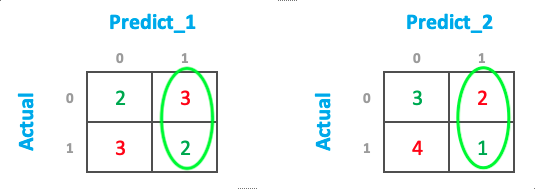

Как видим, теперь - модели по-разному выглядят с точки зрения метрик. Как раз потому, что метрика считает отношение срабатываний. Так, в первом случае, из пяти срабатываний, 2 оказались верными. А, вот вторая модель - из трех срабатываний, угадала ответ только один раз.

## Recall (полнота)

In [10]:
from sklearn.metrics import recall_score

Формула **Recall** выглядит так:

$\displaystyle Recall = \frac{TP}{TP + FN}$

Можно сказать, что это - обратная метрика к Precision (она минимизирует ложные пропуски). Т.е. - показывает долю верно угаданных объектов положительного класса, среди всех объектов положительного класса.

In [11]:
print('Ручной pr_1:', TP_1 / (TP_1 + FN_1))
print('Metric pr_1:', recall_score(true, pr_1))
print()
print('Ручной pr_2:', TP_2 / (TP_2 + FN_2))
print('Metric pr_1:', recall_score(true, pr_2))

Ручной pr_1: 0.4
Metric pr_1: 0.4

Ручной pr_2: 0.2
Metric pr_1: 0.2


И снова - модели разнятся. Первая модель, из пяти истинных единичек, угадала две, а вторая - только 1.

![title](./images/05.png)

Хорошо, посмотрели мы на две метрики, а какую же модель, в итоге, выбрать?

На самом деле, обе эти метрики (*Recall* и *Precision*) тесно связаны, и, зачастую, после пересечения некоего балансового порога, при при росте одного показателя - портится другой. Но что поможет найти этот баланс?

### F1_score

In [12]:
from sklearn.metrics import f1_score

Эта метрика, есть ничто иное, как гармоническое среднее между **Precision** и **Recall**. Она позволяет привести обе метрики к скалярной величине, на которую можно ориентироваться при подборе параметров или сравнивать с метрикой другой модели. Формула, по которой считается эта метрика выглядит так:.

$\displaystyle F1 = \frac{2}{\frac{1}{Precision} \cdot \frac{1}{Recall}} = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$

Или, если оперировать только теми показателями, которые у нас есть:

$\displaystyle F1 = \frac{TP}{TP + \frac{FN + FP}{2}}$

In [15]:
print('Ручной pr_1:', TP_1 / (TP_1 + ((FN_1 + FP_1) / 2)))
print('Metric pr_1:', f1_score(true, pr_1))
print()
print('Ручной pr_1:', TP_2 / (TP_2 + ((FN_2 + FP_2) / 2)))
print('Metric pr_1:', f1_score(true, pr_2))

Ручной pr_1: 0.4
Metric pr_1: 0.4000000000000001

Ручной pr_1: 0.25
Metric pr_1: 0.25


И вот теперь, сравнивая модели, нам нужно понять, что от нас требует бизнес-задача - минимизировать ложные срабатывания, или ложные пропуски. Туда и будем тянуть модель 🙂

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.


https://towardsdatascience.com/understanding-the-confusion-matrix-from-scikit-learn-c51d88929c79

https://habr.com/ru/company/ods/blog/544208/